# Chapter 16: Explicit computation of the latitude EBM using Newton's method

The goal of this script is to compute steady-state solutions for the latitude EBM introduced in lectures using the 'sledgehammer' approach of Newton's method. We will find that, although this works, it is highly dependent on starting with the correct initial guess. 

We seek the steady-state solutions via 
$$
T* = \Phi(T*) = \frac{Q s(y)[1 - a(T*)] - A + k\bar{T^*}}{B + k}
$$

Set the parameters according to those given in lectures

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

A = 202 # outgoing radiation
B = 1.9 # outgoing radiation
k = 1.6*B # transport parameter
s = lambda y: 1 - 0.482*(3*y**2 - 1)/2 # solar weighting
aw = 0.32 # water albedo
ai = 0.62 # ice albedo
Tc = -10.0 # critical temperature for ice formation
Q = 342.0 # solar constant (1380 W/m^2 divided by 4)

Here we define the albedo function $a(y)$ and also the function that we would seek to solve by Newton's method

In [7]:
def afunc(y, ys): 
    # Non-smooth albedo function
    # We want to make 'a' same dimensions as 'y'. Occasionally there are issues if we send in a vector vs. scalar
    y = np.array(y, ndmin=1)  # Converts scalars to arrays but keeps arrays unchanged
    a = np.zeros_like(y)  # Same shape as y
    
    a = 0*y
    for i, yy in enumerate(y):
        if yy > ys:
            aa = ai
        elif yy < ys:
            aa = aw
        else:
            aa = (ai+aw)/2
        a[i] = aa
    return a    

def myF(X):
    # Total number of unknowns is N+1
    N = len(X)-1    
    T =  X[0:N] # Be careful! Python list does not include last
    ys = X[N]   # This is the N+1th element!

    # abar from eqn (14.5) of the notes
    abar = ai + (aw - ai)*ys*(1 - 0.241*(ys**2-1))
    # Tbar_inf from eqn (14.4) of the notes
    Tb = (Q*(1-abar) - A)/B

    # For the given T values, compute Phi at each y
    Phi = (k*Tb + Q*s(y)*(1 - afunc(y, ys)) - A)/(B+k)  
    
    F = np.zeros(N+1)
    F[0:N] = T - Phi
    
    # Need one extra equation 
    PhiC = (k*Tb + Q*s(ys)*(1 - (ai+aw)/2) - A)/(B+k)     
    # Phi only has one entry
    # PhiC = PhiC[0]
    F[N] = PhiC - Tc
    
    return F

We should create an initial guess of the temperature profile. Here is a 'random' guess that goes from high to low. 

Text(0.5, 1.0, 'Initial guess of temperature')

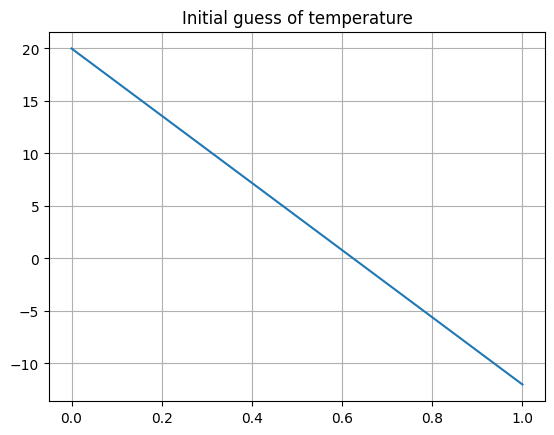

In [10]:
# Initialise the mesh with N points
N = 100
y = np.linspace(0, 1, N)

# Iterative scheme
# Form an initial guess 
# Try this one for the fake solution
Tequator = 20; Tpole = -12;
T0 = Tequator + (Tpole - Tequator)*y

plt.plot(y, T0)
plt.grid(1)
plt.title("Initial guess of temperature")

Now we attempt to solve the system twice, once with an initial guess of the ice line for small $y$ and one with an initial guess with larger $y$. We should play around with parameters to make sure the solutions are robust, and also examine the residuals. 

The solution converged.
The solution converged.


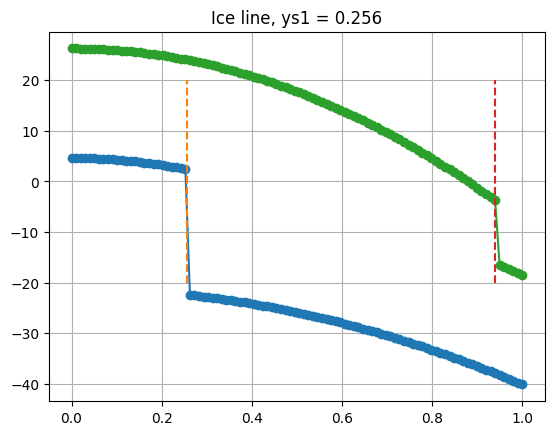

In [13]:
# We also need a guess of the ice line position 
ysguess = 0.3
# Form a system of N+1 unknowns 
guess = np.append(T0, ysguess)

# Run the solver
fwd = lambda X: myF(X)
sol, info, ier, msg = fsolve(fwd, guess, full_output=1)
print(msg)

T = sol[0:N]
ys1 = sol[N]
y = np.linspace(0, 1, N)

plt.plot(y, T, '-o')
plt.plot([ys1, ys1], [-20, 20], '--')
plt.grid(1)
plt.title("Ice line, ys1 = %1.3f" % ys1);

# Solve it again with a higher ice line position
ysguess = 0.9
# Form a system of N+1 unknowns 
guess = np.append(T0, ysguess)

# Run the solver
fwd = lambda X: myF(X)
sol, info, ier, msg = fsolve(fwd, guess, full_output=1)
print(msg)

T = sol[0:N]
ys2 = sol[N]
y = np.linspace(0, 1, N)

plt.plot(y, T, '-o')
plt.plot([ys2, ys2], [-20, 20], '--')
plt.grid(1)
plt.title("Ice line, ys1 = %1.3f" % ys1);